In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression

# Load Data

In [2]:
data=pd.read_csv(r'C:\Users\aswin\Downloads\car_age_price.csv')

In [3]:
data


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Checking the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,112.0,2016.669643,1.629616,2013.0,2015.0,2017.0,2017.0,2020.0
Price,112.0,483866.044643,91217.450533,300000.0,423750.0,500000.0,550000.0,755000.0


In [6]:
 data.shape
    

(112, 2)

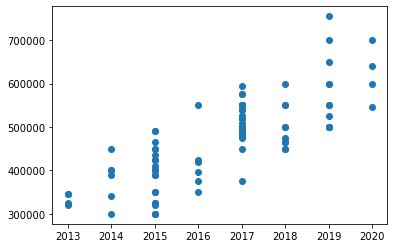

In [7]:
plt.scatter(data.Year,data.Price);

In [8]:
pd =data.drop_duplicates(subset=["Year"])

In [9]:
pd

,Year,Price
0,2018,465000
1,2019,755000
5,2015,350000
6,2016,425000
7,2017,575000
39,2020,545000
50,2013,325000
56,2014,341000


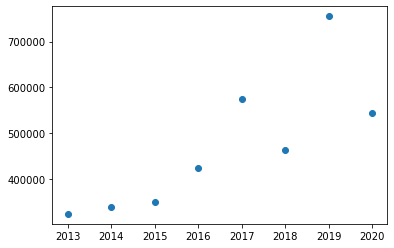

In [10]:
plt.scatter(pd.Year,pd.Price);

# Coorelation 

<AxesSubplot:>

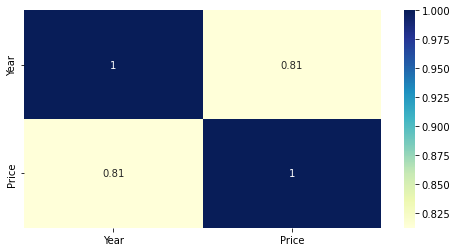

In [11]:
corrmatrix=pd.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,cmap="YlGnBu")

# Linear Regression Model to Predict the Car price in 2022

In [12]:
pd.columns

Index(['Year', 'Price'], dtype='object')

In [13]:
y=data['Price']

In [14]:
X=data[['Year']]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [16]:
X_train.shape


(84, 1)

In [17]:
X_test.shape

(28, 1)

In [18]:
model= LinearRegression()

In [19]:
model.fit(X_train.values,y_train.values)

LinearRegression()

In [20]:
print(model.coef_)

[41691.91919192]


In [21]:
print(model.intercept_)

-83598161.6161616


In [22]:
predicted=model.predict(X_test.values)

In [23]:
predicted.shape

(28,)

In [24]:
predicted=model.predict([[2022]])

In [25]:
predicted

array([702898.98989899])

Price for the Car in 2022 will be 702898 as per the prediction using Linear Regression Model

# Predicting the Car price in 2022 - Lasso Regression

In [26]:
model.score(X_test.values,y_test.values)

0.4686336867683587

In [27]:
model.score(X_train.values,y_train.values)

0.6278427506056824

For alpha=50

In [28]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train.values,y_train.values)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [29]:
lasso_reg.score(X_test.values,y_test.values)

0.46854257501603436

In [30]:
lasso_reg.score(X_train.values,y_train.values)

0.6278426522891777

In [31]:
lasso_reg.predict([[2022]])

array([702809.42760943])

For alpha= 90

In [32]:
lasso_reg=linear_model.Lasso(alpha=90,max_iter=100,tol=0.1)
lasso_reg.fit(X_train.values,y_train.values)

Lasso(alpha=90, max_iter=100, tol=0.1)

In [33]:
lasso_reg.score(X_test.values,y_test.values)

0.46846960507115765

In [34]:
lasso_reg.score(X_train.values,y_train.values)

0.6278424320602269

In [35]:
lasso_reg.predict([[2022]])

array([702737.77777778])

For alpha= 20

In [36]:
lasso_reg=linear_model.Lasso(alpha=20,max_iter=100,tol=0.1)
lasso_reg.fit(X_train.values,y_train.values)

Lasso(alpha=20, max_iter=100, tol=0.1)

In [37]:
lasso_reg.score(X_test.values,y_test.values)

0.46859725549119

In [38]:
lasso_reg.score(X_train.values,y_train.values)

0.6278427348750185

In [39]:
lasso_reg.predict([[2022]])

array([702863.16498317])